## Importanto as bibliotecas

In [1]:
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-whitegrid')

## Implementação

In [2]:
class Perceptron:
    
    def __init__(self, input_table, output_list, activation_function, eta = 0.3):
        self.__X = input_table
        self.__Y = output_list
        self.__W = np.random.random_sample(input_table.shape[1]) - 0.5
        self.__activation_function = activation_function
        self.__eta = eta
        self.__number_of_epochs = None
        self.__number_of_adjustments = None
    
    @property
    def number_of_epochs(self):
        return self.__number_of_epochs
    
    @property
    def number_of_adjustments(self):
        return self.__number_of_adjustments
    
    @property
    def input_table(self):
        return copy.deepcopy(self.__X)
    
    @property
    def output_list(self):
        return copy.deepcopy(self.__Y)
    
    @property
    def weight_list(self):
        return copy.copy(self.__W)
    
    def weighted_sum(self, x):
        return np.dot(x, self.__W)
    
    def output(self, x):
        return self.__activation_function(self.weighted_sum(x))
    
    def fit(self):
        
        n = len(self.__X)
        is_still_learning = True
        self.__number_of_epochs = 0
        self.__number_of_adjustments = 0
        
        while(is_still_learning):
            
            adjustments_in_epoch = 0
            
            for x, y in zip(self.__X, self.__Y):
                
                yd = self.output(x)
                
                if(y != yd):
                    self.__W += self.__eta * (y - yd) * x
                    adjustments_in_epoch += 1
                    
            self.__number_of_adjustments += adjustments_in_epoch
            self.__number_of_epochs += 1
            is_still_learning = adjustments_in_epoch > 0
            
            print(f'Epoch {self.__number_of_epochs}')
            print(f'Weight vector: {self.__W}')
            print(f'Correct examples: {n - adjustments_in_epoch}')
            print(f'Incorrect examples: {adjustments_in_epoch}')
            print()
            

## Treinamento

In [3]:
def simple_activation_function(u):
    return int(u >= 0)

X = np.array([[-1,0,0] ,[-1,0,1] ,[-1,1,0] ,[-1,1,1]])
Y = [1, 1, 1, 0]

neuron = Perceptron(X, Y, simple_activation_function)
neuron.fit()
print(f'Total number of adjustments: {neuron.number_of_adjustments}')
print(f'Total number of epochs: {neuron.number_of_epochs}')

Epoch 1
Weight vector: [ 0.0714906  -0.23082436 -0.15320099]
Correct examples: 2
Incorrect examples: 2

Epoch 2
Weight vector: [-0.2285094  -0.23082436 -0.45320099]
Correct examples: 1
Incorrect examples: 3

Epoch 3
Weight vector: [-0.2285094  -0.53082436 -0.45320099]
Correct examples: 2
Incorrect examples: 2

Epoch 4
Weight vector: [-0.5285094  -0.53082436 -0.45320099]
Correct examples: 1
Incorrect examples: 3

Epoch 5
Weight vector: [-0.5285094  -0.53082436 -0.75320099]
Correct examples: 2
Incorrect examples: 2

Epoch 6
Weight vector: [-0.8285094  -0.53082436 -0.45320099]
Correct examples: 3
Incorrect examples: 1

Epoch 7
Weight vector: [-0.8285094  -0.53082436 -0.45320099]
Correct examples: 4
Incorrect examples: 0

Total number of adjustments: 13
Total number of epochs: 7


## Fronteira de Decisão

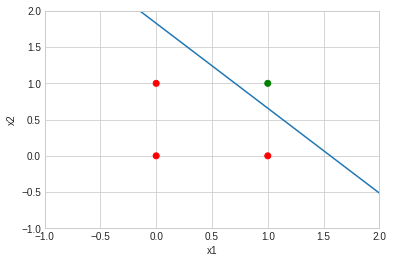

In [4]:
W = neuron.weight_list
x = np.linspace(-1, 2, 1000)
y = W[0]/W[2] - (W[1]/W[2]) * x

x1 = []
x2 = []
color_map = ['green', 'red']
colors = []

for i in range(len(X)):
    x1.append(X[i][1])
    x2.append(X[i][2])
    colors.append(color_map[Y[i]])

plt.axis([-1, 2, -1, 2])
plt.scatter(x1, x2, color = colors)
plt.plot(x, y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Funções de Ativação

In [5]:
intervalo = list(np.arange(-1.5,1.5,0.01))

### Degrau

In [6]:
theta = 0.5
def step(u):
    return 1 if u >= theta else 0

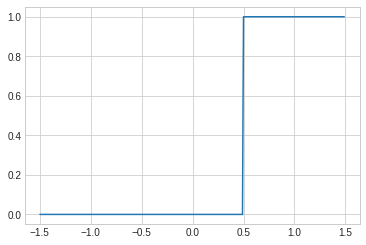

In [7]:
y = [step(x) for x in intervalo]
plt.plot(intervalo,y)
plt.grid(True)
plt.show()

### Sigmoidal

In [8]:
x0 = 0
def sigmoid(k,u):
    return 1 / (1 + math.exp(-k*(u-x0)))

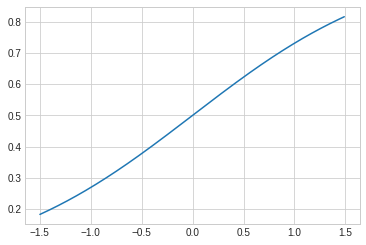

In [9]:
y = [sigmoid(1,x) for x in intervalo]
plt.plot(intervalo,y)
plt.grid(True)
plt.show()

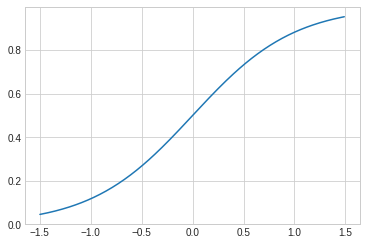

In [10]:
y = [sigmoid(2,x) for x in intervalo]
plt.plot(intervalo,y)
plt.grid(True)
plt.show()

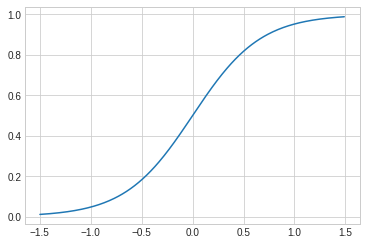

In [11]:
y = [sigmoid(3,x) for x in intervalo]
plt.plot(intervalo,y)
plt.grid(True)
plt.show()

### Tangente Hiperbólica

In [12]:
def hyptan(u):
    return np.tanh(u)

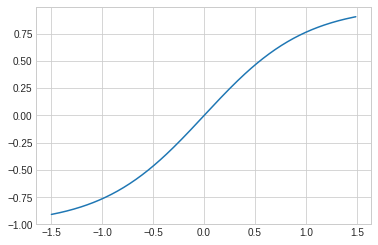

In [13]:
y = [hyptan(x) for x in intervalo]
plt.plot(intervalo,y)
plt.grid(True)
plt.show()

### ReLU

In [14]:
def relu(u):
    return max(0,u)

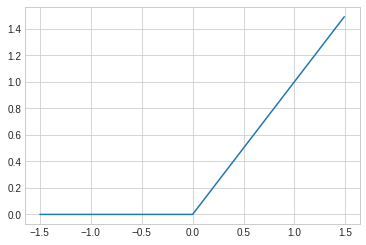

In [15]:
y = [relu(x) for x in intervalo]
plt.plot(intervalo,y)
plt.grid(True)
plt.show()